In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-load-forecasting/train_dataframes.xlsx
/kaggle/input/electricity-load-forecasting/continuous dataset.csv
/kaggle/input/electricity-load-forecasting/test_dataframes.xlsx
/kaggle/input/electricity-load-forecasting/weekly pre-dispatch forecast.csv


In [83]:
import numpy as np
import pandas as pd
df=pd.read_csv('../input/electricity-load-forecasting/continuous dataset.csv')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [84]:
#Template------Priyobroto Acharya---------Jadavpur University-----------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.svm import SVC
import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nat_demand,48048.0,1182.868647,192.068896,85.192500,1020.056900,1168.427700,1327.563950,1754.882000
T2M_toc,48048.0,27.399111,1.675462,22.953455,26.160455,27.118051,28.558344,35.039575
QV2M_toc,48048.0,0.018313,0.001607,0.012054,0.017236,0.018590,0.019521,0.022690
TQL_toc,48048.0,0.079979,0.065589,0.000000,0.026451,0.065201,0.117310,0.521240
W2M_toc,48048.0,13.391049,7.295502,0.008979,7.544958,12.182103,18.661282,39.229726
T2M_san,48048.0,26.921023,3.018129,19.765222,24.769281,26.167352,28.712335,39.063440
QV2M_san,48048.0,0.017844,0.001889,0.010247,0.016584,0.018351,0.019242,0.022165
TQL_san,48048.0,0.106265,0.086293,0.000009,0.036819,0.085968,0.157288,0.484985
W2M_san,48048.0,7.046675,4.103711,0.060394,3.955051,5.992762,9.409871,24.483937
T2M_dav,48048.0,24.719513,2.414019,19.933740,22.954652,24.001718,26.243402,34.216211


In [86]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

<Axes: >

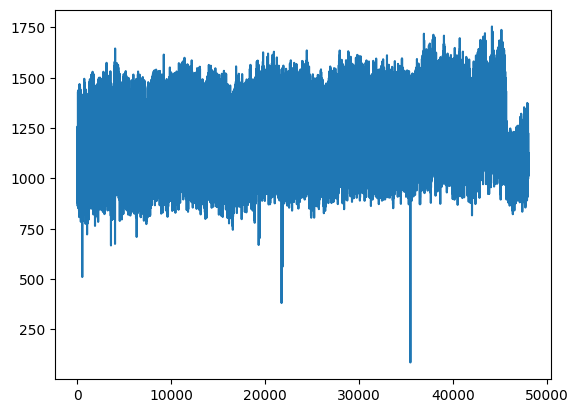

In [87]:


df["nat_demand"].plot()



In [90]:
df['nat_demand'].value_counts()

nat_demand
1003.9806    2
1002.4377    2
973.8241     2
927.7455     2
956.2212     2
            ..
1186.5096    1
1218.7356    1
1197.0691    1
1153.4618    1
1013.5683    1
Name: count, Length: 47909, dtype: int64

In [91]:
train_df = pd.read_excel('/kaggle/input/electricity-load-forecasting/train_dataframes.xlsx', index_col=[0],
                  parse_dates=[0])
train_df

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763,1397.5788
2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545,1350.5093
2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232,1308.7955


In [92]:
test_df = pd.read_excel('/kaggle/input/electricity-load-forecasting/test_dataframes.xlsx', 
                 index_col=[0],
                  parse_dates=[0])
test_df

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2019-04-13 01:00:00,1064.7486,1204.5668,1117.8152,1118.154250,1,1,0,0,1,26.791528,1161.6177
2019-04-13 02:00:00,1041.7521,1145.5341,1082.5688,1078.061950,1,1,0,0,2,26.707971,1130.4635
2019-04-13 03:00:00,1021.1577,1069.8026,1050.1252,1040.469075,1,1,0,0,3,26.616541,1093.8777
2019-04-13 04:00:00,990.2549,1047.7100,1039.1658,1021.725725,1,1,0,0,4,26.542291,1083.0332
2019-04-13 05:00:00,1005.2366,1038.5837,1039.1370,1021.294000,1,1,0,0,5,26.467188,1081.2705
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-19 20:00:00,1343.4547,1343.3746,1430.9092,1372.579500,7,0,1,9,20,28.373438,1169.1743
2019-04-19 21:00:00,1281.4317,1295.9271,1401.2511,1326.203300,7,0,1,9,21,27.841547,1156.5246
2019-04-19 22:00:00,1219.6607,1257.8020,1331.1551,1269.539267,7,0,1,9,22,27.478448,1133.0677


In [93]:
train_df.columns[0]

'week_X-2'

In [94]:
train_df.shape

(36720, 11)

In [95]:
X=train_df.drop('DEMAND',axis=1)
y=train_df['DEMAND']


In [263]:
X

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc
datetime,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558
...,...,...,...,...,...,...,...,...,...,...
2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763
2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545
2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232


In [264]:
y

datetime
2015-01-31 01:00:00     954.2018
2015-01-31 02:00:00     913.8660
2015-01-31 03:00:00     903.3637
2015-01-31 04:00:00     889.0806
2015-01-31 05:00:00     910.1472
                         ...    
2019-04-09 20:00:00    1397.5788
2019-04-09 21:00:00    1350.5093
2019-04-09 22:00:00    1308.7955
2019-04-09 23:00:00    1232.4521
2019-04-10 00:00:00    1155.5925
Name: DEMAND, Length: 36720, dtype: float64

In [265]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [267]:
X_train_scaled

array([[-1.45789303, -1.30898528, -0.87147685, ..., -0.22436249,
        -0.93770101, -1.1058544 ],
       [-0.09274981,  0.37711249,  0.00989613, ..., -0.22436249,
         1.07931883, -0.084382  ],
       [ 0.60140237,  0.76871568,  0.61517384, ..., -0.22436249,
         1.22339168, -0.40994281],
       ...,
       [ 2.04092285,  1.56972071,  2.15596495, ..., -0.22436249,
        -0.07326393,  1.70555016],
       [ 0.75061831,  0.65633842,  0.34501067, ...,  2.58713857,
         0.93524599,  0.06870478],
       [ 0.4943263 ,  0.51851643,  0.62835503, ..., -0.22436249,
         1.22339168, -0.33306422]])

In [268]:
X_test_scaled

array([[-0.74507841, -1.22179732, -1.16053713, ..., -0.22436249,
        -0.36140963,  0.54496067],
       [ 1.34721694,  1.44737491,  1.30140604, ..., -0.22436249,
        -0.21733678,  0.17671168],
       [-0.54755623, -0.11392793,  0.14240096, ..., -0.22436249,
         1.36746453, -0.04430294],
       ...,
       [-0.94681223, -0.64829568, -0.69338252, ..., -0.22436249,
        -1.65806524, -1.17961654],
       [ 1.9302594 ,  1.5091541 ,  1.68122758, ..., -0.22436249,
         0.21488176,  0.77746269],
       [-0.47003002, -0.38214114, -0.53515031, ..., -0.22436249,
         1.07931883,  0.46656009]])

In [269]:
import tensorflow
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense


In [271]:
from tensorflow import keras

hidden_units = 40

model = keras.Sequential([
  keras.layers.Dense(hidden_units, activation='selu', input_dim=10,kernel_initializer='he_normal'),

  keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal'),

  keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal'),
    
  keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal'),

  keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mae')


In [276]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),epochs= 1000)

Epoch 1/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42.1739 - val_loss: 43.9089
Epoch 2/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42.4182 - val_loss: 40.6290
Epoch 3/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.5453 - val_loss: 40.9852
Epoch 4/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 41.9900 - val_loss: 41.4956
Epoch 5/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.4440 - val_loss: 40.9061
Epoch 6/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.9960 - val_loss: 41.0639
Epoch 7/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.3398 - val_loss: 42.0415
Epoch 8/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.5585 - val_loss: 40.6311
Epoch 9/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.2722 - val_loss: 39.8922
Epoch 10/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.9036 - val_loss: 41.7621
Epoch 11/1000
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.7605 - val_loss: 40.9932
Epoch 12

In [277]:
y_pred=model.predict(X_test_scaled)

345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [280]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2_score", r2*100)

r2_score 93.42470263919803


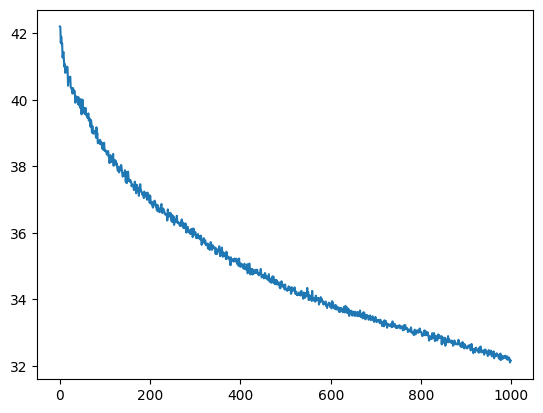

In [279]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])